<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16648\2557059160.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set2')


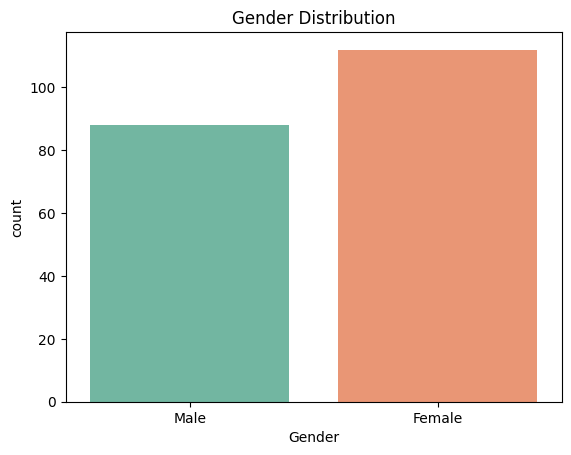

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16648\2557059160.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, palette='Set3')


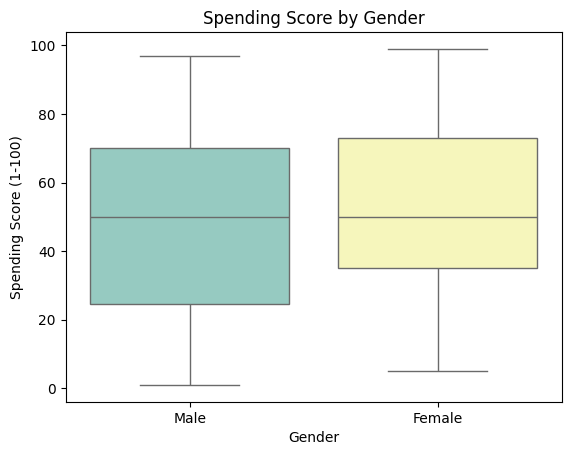

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def data_cleaning_and_eda(path):
    data = pd.read_csv(path)
    data = data.drop_duplicates()
    data = data.dropna()
    print(data.info())
    print(data.describe())
    sns.countplot(x='Gender', data=data, palette='Set2')
    plt.title("Gender Distribution")
    plt.show()

    sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, palette='Set3')
    plt.title("Spending Score by Gender")
    plt.show()

    return data

path = r"C:\GuviProject2\Mall_Customers.csv"
data = data_cleaning_and_eda(path)

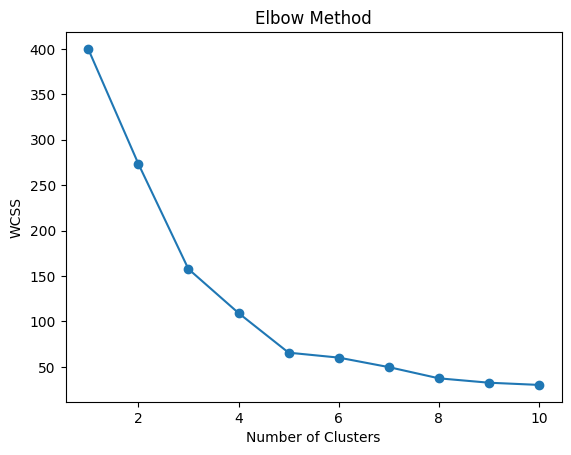

Clustering completed. Added 'Cluster' column.


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def algorithm_selection(data):
    # Select features for clustering
    X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Find optimal number of clusters using Elbow Method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss, marker='o')
    plt.title("Elbow Method")
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS")
    plt.show()

    # Choose optimal number of clusters (based on elbow curve)
    kmeans = KMeans(n_clusters=5, random_state=42)
    data["Cluster"] = kmeans.fit_predict(X_scaled)

    print("Clustering completed. Added 'Cluster' column.")
    return data, kmeans, X_scaled

data, model, X_scaled = algorithm_selection(data)

In [17]:
from sklearn.metrics import silhouette_score

def evaluate_model(model, X_scaled):
    """
    Evaluate the K-Means model using Silhouette Score.
    """
    # Fit and predict clusters
    cluster_labels = model.fit_predict(X_scaled)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)

    print(f"✅ Number of Clusters: {model.n_clusters}")
    print(f"📊 Silhouette Score: {silhouette_avg:.3f}")

    return silhouette_avg, cluster_labels


silhouette_avg, cluster_labels = evaluate_model(model, X_scaled)

✅ Number of Clusters: 5
📊 Silhouette Score: 0.555


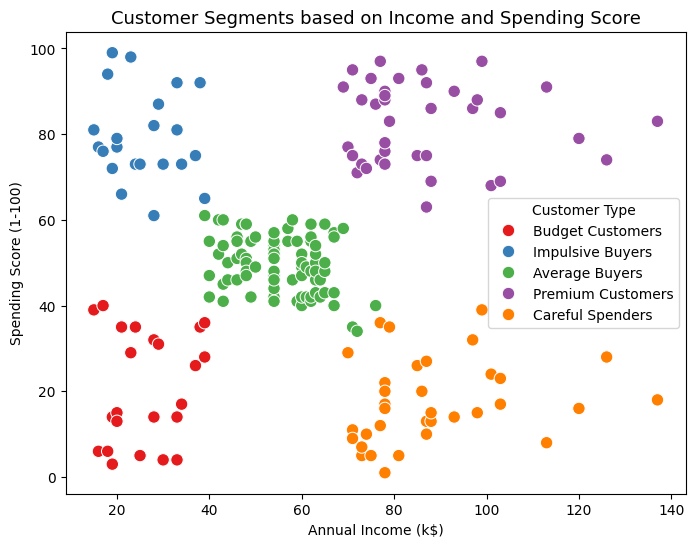

In [26]:
kmeans = KMeans(n_clusters=5, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_scaled)

cluster_labels = {
    0: "Average Buyers",
    1: "Premium Customers",
    2: "Impulsive Buyers",
    3: "Careful Spenders",
    4: "Budget Customers"
}

data["Cluster_Label"] = data["Cluster"].map(cluster_labels)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster_Label",
    data=data,
    palette="Set1",
    s=80
)

plt.title("Customer Segments based on Income and Spending Score", fontsize=13)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Customer Type")
plt.show()
